# Compare hidden states when using causal vs. bidirectional attention

In [1]:
import os

import scipy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# configure matplotlib
plt.rcParams['text.usetex'] = True # enable LaTeX plotting

params = {
    "axes.linewidth": 1.5
}
matplotlib.rcParams.update(params) # set default parameters for matplotlib

In [3]:
# model_name_or_path, num_layers = "princeton-nlp/Sheared-LLaMA-1.3B", 24
# model_name_or_path, num_layers = "meta-llama/Llama-2-7b-chat-hf", 32
# model_name_or_path, num_layers = "mistralai/Mistral-7B-v0.1", 32
# model_name_or_path, num_layers = "mistralai/Mistral-7B-Instruct-v0.1", 32
model_name_or_path, num_layers = "mistralai/Mistral-7B-Instruct-v0.2", 32

In [4]:
# specify data path
text_id = "Montreal"
data_path = f"/Users/mariusmosbach/Development/plots/llm2vec/data/hidden_states_data/{text_id}/{model_name_or_path.split('/')[-1]}"
data_path

'/Users/mariusmosbach/Development/plots/llm2vec/data/hidden_states_data/Montreal/Mistral-7B-Instruct-v0.2'

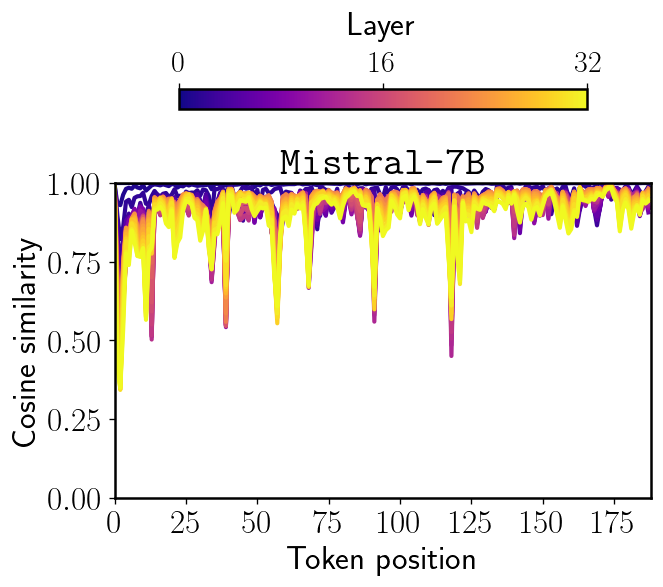

In [5]:
colors = plt.cm.plasma(np.linspace(0, 1, num_layers))

TITLES = {
    "princeton-nlp/Sheared-LLaMA-1.3B": r"\texttt{S-LLaMA-1.3B}",
    "meta-llama/Llama-2-7b-chat-hf": r"\texttt{LLaMA-2-7B}",
    "mistralai/Mistral-7B-v0.1": r"\texttt{Mistral-7B}",
    "mistralai/Mistral-7B-Instruct-v0.1": r"\texttt{Mistral-7B}",
    "mistralai/Mistral-7B-Instruct-v0.2": r"\texttt{Mistral-7B}",
}

# create a new figure
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(5.5, 5.0), dpi=120,)

for idx, layer in enumerate(range(num_layers)):
    # load hidden represenations
    H_c = np.load(os.path.join(data_path, "causal", f"H_layer{layer}.npy")).squeeze()
    H_b = np.load(os.path.join(data_path, "bidirectional", f"H_layer{layer}.npy")).squeeze()
    
    # compute cosine similarity between hidden representations
    cosine_sim = [1 - scipy.spatial.distance.cosine(H_c[pos], H_b[pos]) for pos in range(len(H_c))]
    
    # create line plot
    axes.plot(cosine_sim, linewidth=2.5, label=f"layer={layer}", c=colors[idx])

# format plot
xticks = np.arange(0, 225, 25) # this depends on the input text length (you might have to update this when using different inputs)
axes.set_xticks(xticks)
axes.set_xticklabels([rf"${x}$" for x in xticks], fontsize=20)
axes.set_xlim(0, len(cosine_sim))
axes.set_xlabel("Token position", fontsize=20)
axes.set_ylabel("Cosine similarity", fontsize=20)
axes.tick_params(axis='y', which='major', labelsize=20)
axes.set_ylim(0, 1)
axes.set_title(TITLES[model_name_or_path], fontsize=24)

# add colorbar on top of the plot
sm = plt.cm.ScalarMappable(cmap="plasma", norm=plt.Normalize(vmin=0, vmax=num_layers))
cbarticks = [0, num_layers /  2, num_layers]
cbar = plt.colorbar(sm, ticks=cbarticks, ax=axes, fraction=0.05, pad=0.18, orientation="horizontal", location="top")
cbar.set_label(label='Layer', fontsize=20, labelpad=10)
cbar.ax.tick_params(labelsize=18) 

# save plot
save_path = '/Users/mariusmosbach/Development/plots/llm2vec/saved_plots/hidden_analysis'
plt.tight_layout()
plot_path = os.path.join(save_path, f"{text_id}_{model_name_or_path.split('/')[-1]}.pdf")
plt.savefig(plot_path, dpi='figure', bbox_inches='tight')
plt.show()
plt.close();